In [67]:
#### Conditions #####
S = 100
K = 100
T = 1
r = 0.07
sigma = 0.2
Nsimulations = 10
Nsteps = 20

In [68]:
dt = T/Nsteps

In [69]:
#### Components
import numpy as np
drift = (r-(sigma**2)/2)*dt
a = sigma*np.sqrt(dt)
np.random.seed(10)

#### Random variable simulation
x=np.random.normal(0,1,(Nsimulations, Nsteps))
x

array([[ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
        -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
         0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
         0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489],
       [-1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
         1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
        -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
         0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ],
       [ 0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
        -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
        -0.02590534,  0.2890942 , -0.53987907,  0.70816002,  0.84222474,
         0.2035808 ,  2.39470366,  0.91745894, -0.11227247, -0.36218045],
       [-0.23218226, -0.5017289 ,  1.12878515, -0.69781003, -0.08112218,
        -0.52929608,  1.04618286, -1.41855603, -

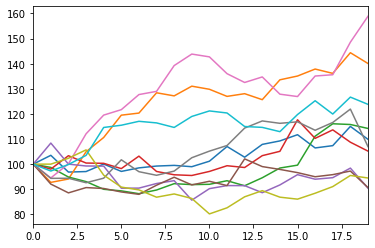

In [76]:
#### Stock Price Simulation
Smat = np.zeros((Nsimulations, Nsteps))
Smat[:,0]+=S
for i in range(1,Nsteps):
    Smat[:,i] = Smat[:,i-1]*np.exp(drift + a*x[:,i])
Smat
import pandas as pd
dfSmat = pd.DataFrame((Smat).transpose())

import matplotlib.pyplot as plt
%matplotlib inline
dfSmat.plot(legend = False)

In [53]:
q = Smat[:,-1]-K
print(q)
for i in range(len(q)):
    if q[i] <0:
        q[i]=0
    else:
        q[i] = q[i]
print(q)

[ 14.41523586  15.70733856   2.81605023 ... -22.7444422  -13.13194716
  -1.99642179]
[14.41523586 15.70733856  2.81605023 ...  0.          0.
  0.        ]


In [54]:
p = K-Smat[:,-1]
for i in range(len(p)):
    if p[i]<0:
        p[i]=0
    else:
        p[i]=p[i]
p

array([ 0.        ,  0.        ,  0.        , ..., 22.7444422 ,
       13.13194716,  1.99642179])

In [55]:
payoff_call = np.mean(q)
payoff_put = np.mean(p)
print(payoff_call)
print(payoff_put)

12.362693054688576
5.2466686210635896


In [56]:
call = payoff_call*np.exp(-r*T)
put = payoff_put*np.exp(-r*T)
print(call)
print(put)

11.526898601585817
4.891961397374154
